In [1]:
%matplotlib inline
import sys, os
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import json

plt.rcParams['figure.figsize']        = 8., 6.
plt.rcParams['figure.dpi']            = 100
plt.rcParams['figure.subplot.left']   = 0.125
plt.rcParams['figure.subplot.right']  = 0.9
plt.rcParams['figure.subplot.bottom'] = 0.125
plt.rcParams['figure.subplot.top']    = 0.9
plt.rcParams['axes.labelsize']        = 18
plt.rcParams['axes.titlesize']        = 18
plt.rcParams['xtick.top']             = True
plt.rcParams['xtick.bottom']          = True
plt.rcParams['ytick.left']            = True
plt.rcParams['ytick.right']           = True
plt.rcParams['xtick.direction']       = 'in'
plt.rcParams['ytick.direction']       = 'in'
plt.rcParams['xtick.labelsize']       = 18
plt.rcParams['ytick.labelsize']       = 18
plt.rcParams['xtick.major.pad']       = 6.
plt.rcParams['xtick.minor.pad']       = 6.
plt.rcParams['ytick.major.pad']       = 6.
plt.rcParams['ytick.minor.pad']       = 6.
plt.rcParams['xtick.major.size']      = 6. # major tick size in points
plt.rcParams['xtick.minor.size']      = 3. # minor tick size in points
plt.rcParams['ytick.major.size']      = 6. # major tick size in points
plt.rcParams['ytick.minor.size']      = 3. # minor tick size in points
plt.rcParams['text.usetex']           = True
plt.rcParams['font.family']           = 'serif'
#plt.rcParams['font.serif']            = 'Computer Modern Roman Bold'
plt.rcParams['font.size']             = 18

from emulator import Emulator


In [7]:
#load and call pretrained CLEFT/halofit models

cleft_pmm_emu = Emulator('../nn_weights/lrg_x_planck_cleft_priors_buzzard_shape_halofit_pmm_20xfast_rs_spectra_1e6pts_training_data_v1_pmm_emu',kmax=1.0)
cleft_pgm_emu = Emulator('../nn_weights/lrg_x_planck_cleft_priors_buzzard_shape_20xfast_rs_spectra_1e6pts_training_data_v1_pgm_emu', kmax=1.0)
cleft_pgg_emu = Emulator('../nn_weights/lrg_x_planck_cleft_priors_buzzard_shape_20xfast_rs_spectra_1e6pts_training_data_v1_pgg_emu', kmax=1.0)


In [22]:
#order of parameters is ln(10^10A_s), H0, omch2, z
pmm_params = [3.1, 70., 0.12, 0.5]
k, pmm_pred = cleft_pmm_emu(pmm_params)

#order of parameters is ln(10^10A_s), H0, omch2, b1, b2, alpha_{a/x}, SN, z
pgm_params = [3.1, 70., 0.12, 1.5, 0.1, 5, 1000, 0.5]

k, pgm_pred = cleft_pgm_emu(pgm_params)

pgg_params = [3.1, 70., 0.12, 1.5, 0.1, -5, 1000, 0.5]

k, pgg_pred = cleft_pgg_emu(pgg_params)


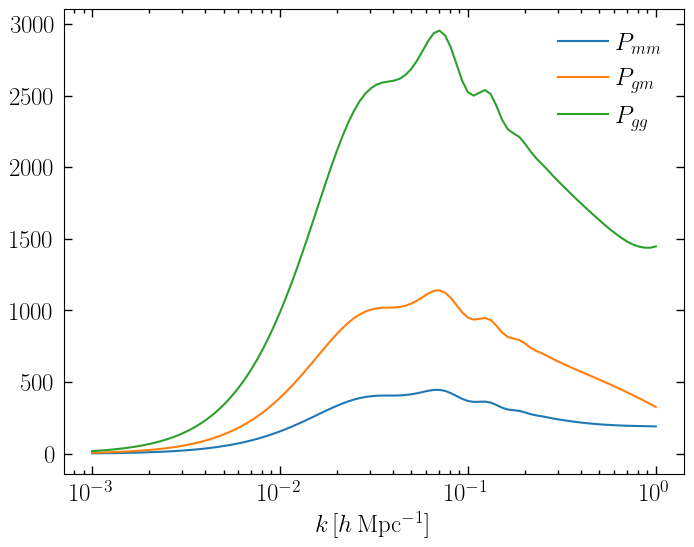

In [23]:
plt.semilogx(k, k * pmm_pred);
plt.semilogx(k, k * pgm_pred);
plt.semilogx(k, k * pgg_pred);
plt.xlabel(r'$k \, [h\, \rm Mpc^{-1}]$')
plt.legend(['$P_{mm}$', '$P_{gm}$', '$P_{gg}$'])

In [25]:
anzu_pmm_emu = Emulator('../nn_weights/lrg_x_planck_aemulus_priors_20xfast_rs_spectra_1e6pts_training_data_v1_pmm_emu',kmax=1.0)
anzu_pgm_emu = Emulator('../nn_weights/lrg_x_planck_aemulus_priors_20xfast_rs_spectra_1e6pts_training_data_v1_pgm_emu', kmax=1.0)
anzu_pgg_emu = Emulator('../nn_weights/lrg_x_planck_aemulus_priors_20xfast_rs_spectra_1e6pts_training_data_v1_pgg_emu', kmax=1.0)


In [31]:
#order of parameters is ln(10^10A_s), ns, H0, w, ombh2, omch2, z
pmm_params = [3.1, 0.97, 70., -1, 0.022, 0.12, 0.5]
k, pmm_pred = anzu_pmm_emu(pmm_params)

#order of parameters is ln(10^10A_s), H0, omch2, b1, b2, b_k, SN, z
pgm_params = [3.1, 0.97, 70., -1, 0.022, 0.12, 1.5, 0.1, 0.1, 1000, 0.5]

k, pgm_pred = anzu_pgm_emu(pgm_params)

pgg_params = [3.1, 0.97, 70., -1, 0.022, 0.12, 1.5, 0.1, 0.1, 1000, 0.5]

k, pgg_pred = anzu_pgg_emu(pgg_params)


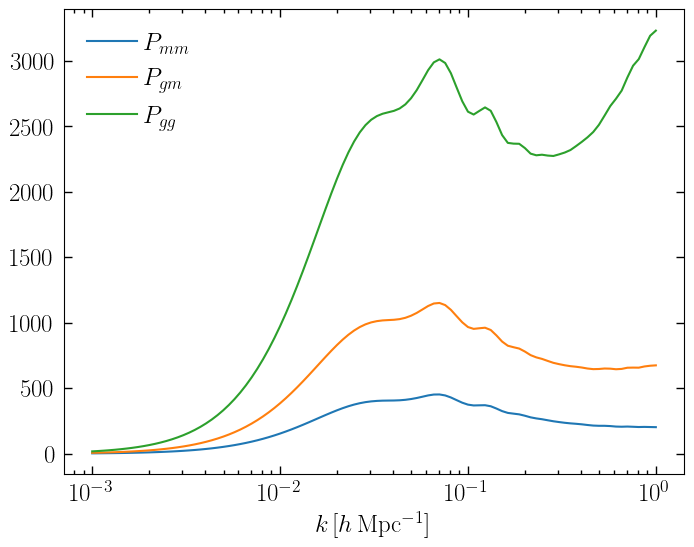

In [32]:
plt.semilogx(k, k * pmm_pred);
plt.semilogx(k, k * pgm_pred);
plt.semilogx(k, k * pgg_pred);
plt.xlabel(r'$k \, [h\, \rm Mpc^{-1}]$')
plt.legend(['$P_{mm}$', '$P_{gm}$', '$P_{gg}$'])

In [33]:
p0_emu = Emulator('../nn_weights/ptchallenge_cmass2_20xfast_1e6pts_training_data_v2_p0_emu',kmax=0.5)
p2_emu = Emulator('../nn_weights/ptchallenge_cmass2_20xfast_1e6pts_training_data_v2_p2_emu', kmax=0.5)
p4_emu = Emulator('../nn_weights/ptchallenge_cmass2_20xfast_1e6pts_training_data_v2_p4_emu', kmax=0.5)


In [36]:
#order of parameters is ln(10^10A_s), H0, omega_m, b1, b2, bs, alpha_0, alpha_2, R_h^3, sigma^2 R_h^3
params = [3.1, 70., 0.3, 1.5, 0.5, 0.2, 5, 5, 100, 100]
k, p0_pred = p0_emu(params)
k, p2_pred = p2_emu(params)
k, p4_pred = p4_emu(params)


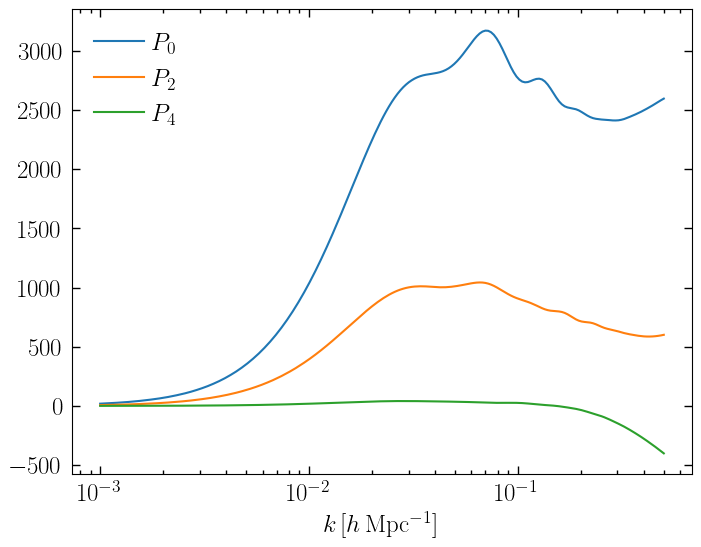

In [37]:
plt.semilogx(k, k * p0_pred);
plt.semilogx(k, k * p2_pred);
plt.semilogx(k, k * p4_pred);
plt.xlabel(r'$k \, [h\, \rm Mpc^{-1}]$')
plt.legend(['$P_{0}$', '$P_{2}$', '$P_{4}$'])